##IMPORT DATASETS AND LIBRARIES

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [18]:
stocks_df = pd.read_csv('stock.csv')

##Exploratory Data Analysis and visualisation

In [19]:
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [20]:
#sort the stock data by date
stocks_df.sort_values(['Date'])

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [21]:
# Get the mean values
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [22]:
# Get the dataframe values
stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [23]:
# Print out the number of stocks
print('Total Number of Stocks: {}'.format(len(stocks_df.columns[1:])))

Total Number of Stocks: 9


In [24]:
# Print the name of stocks
for i in stocks_df.columns[1:]:
  print(i)

AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [25]:
#What is the average return of the S&P500?
s = stocks_df['sp500'].mean()
s

2218.7495540592868

In [26]:
#Stock/index with the minimum dispertion from the mean
stocks_df.drop('Date', axis=1).std()

,0
AAPL,70.827601
BA,103.678586
T,3.207490
MGM,6.963847
AMZN,697.838905
IBM,25.561938
TSLA,210.988003
GOOG,334.448057
sp500,537.321727


In [27]:
#Amazon maximum price
a_max = stocks_df['AMZN'].max()
print('Maximum price for Amazon stock between 2012 & 2020 was: {}'.format(a_max))

Maximum price for Amazon stock between 2012 & 2020 was: 3225.0


In [28]:
# Check if data contains any null values
stocks_df.isnull().sum()

,0
Date,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [30]:
# Visualize Stocks data
def show_plot(df, title):
  df.plot(x = 'Date', figsize=(12, 8), linewidth = 3, title=title)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid()
  plt.show()

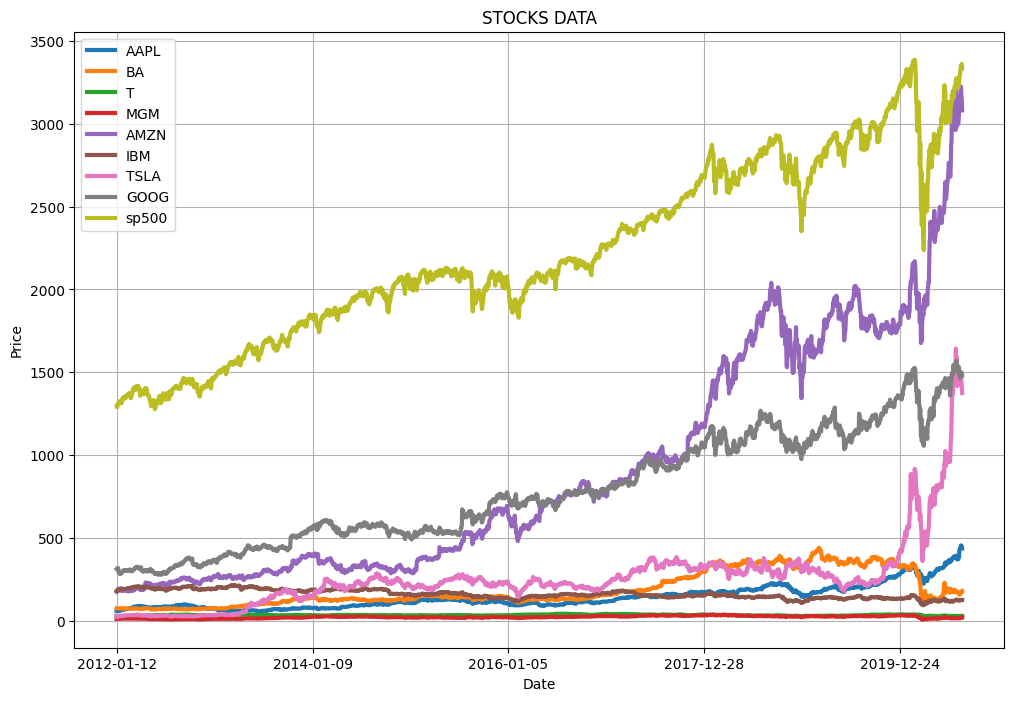

In [31]:
# Plot the data
show_plot(stocks_df, 'STOCKS DATA')

In [32]:
#Normalized Stock Dara
def show_plot(df, title):
  df.plot(x = 'Date', figsize=(12, 8), linewidth = 3, title=title)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.grid()
  plt.show()

In [33]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


In [34]:
normalize(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


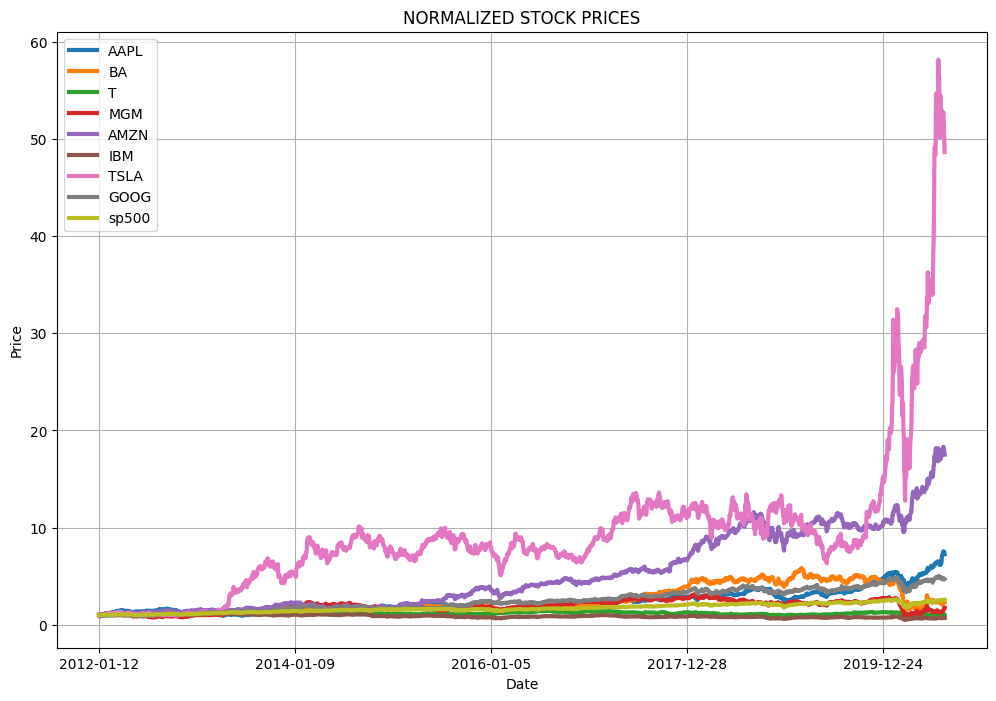

In [35]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [36]:
# Create Interactive chart of Stock Data

def interactive_plot(df, title):
  fig = px.line(title=title)

  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
    fig.update_layout(
      xaxis_title = "Date",
      yaxis_title = "Price"
  )
  fig.show()

In [37]:
interactive_plot(stocks_df, 'STOCKS DATA')

In [38]:
# Create Interactive chart of Normalized Stock Data
interactive_plot(normalize(stocks_df), 'STOCKS DATA')

In [39]:
#Calculate stocks daily returns

def daily_return(df):
  df_daily_return = df.copy()
#loop for columns
  for i in df.columns[1:]:
#loop for rows
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / (df[i][j-1]))*100

    df_daily_return[i][0] = 0

  return df_daily_return

In [40]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


##Interactive Data Visualisation

In [41]:
interactive_plot(stocks_daily_return, 'Stocks Daily returns')

In [42]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()
cm

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385250,0.341373,0.384089,0.410234,0.434534,0.288535,0.509125,0.657321
BA,0.385250,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384089,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439142,0.631449
AMZN,0.410234,0.267466,0.233145,0.309016,1.000000,0.339589,0.310084,0.575284,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245609,0.458816,0.703935
TSLA,0.288535,0.250946,0.152515,0.311879,0.310084,0.245609,1.000000,0.322805,0.387921
GOOG,0.509125,0.388048,0.353695,0.439142,0.575284,0.458816,0.322805,1.000000,0.684572
sp500,0.657321,0.641826,0.617463,0.631449,0.539560,0.703935,0.387921,0.684572,1.000000


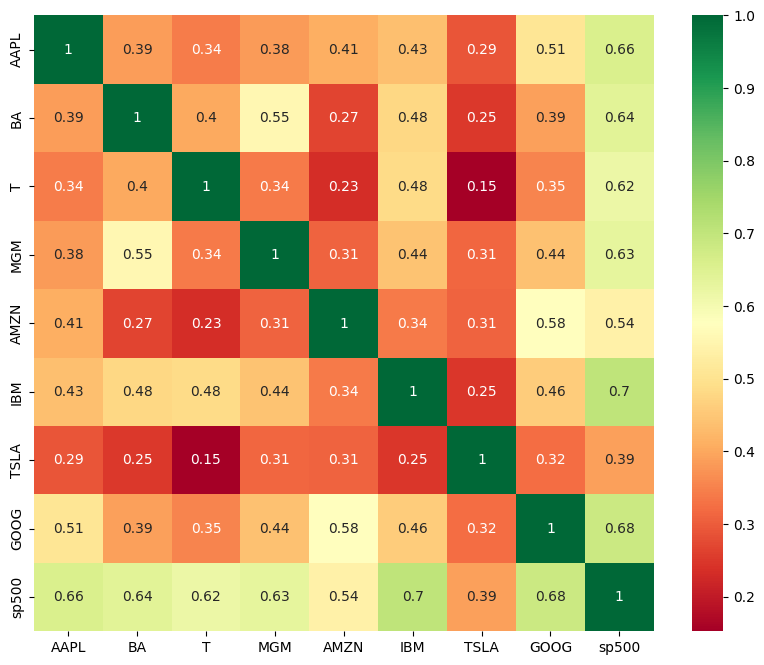

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='RdYlGn') #true give you the values on the heatmap
plt.show()

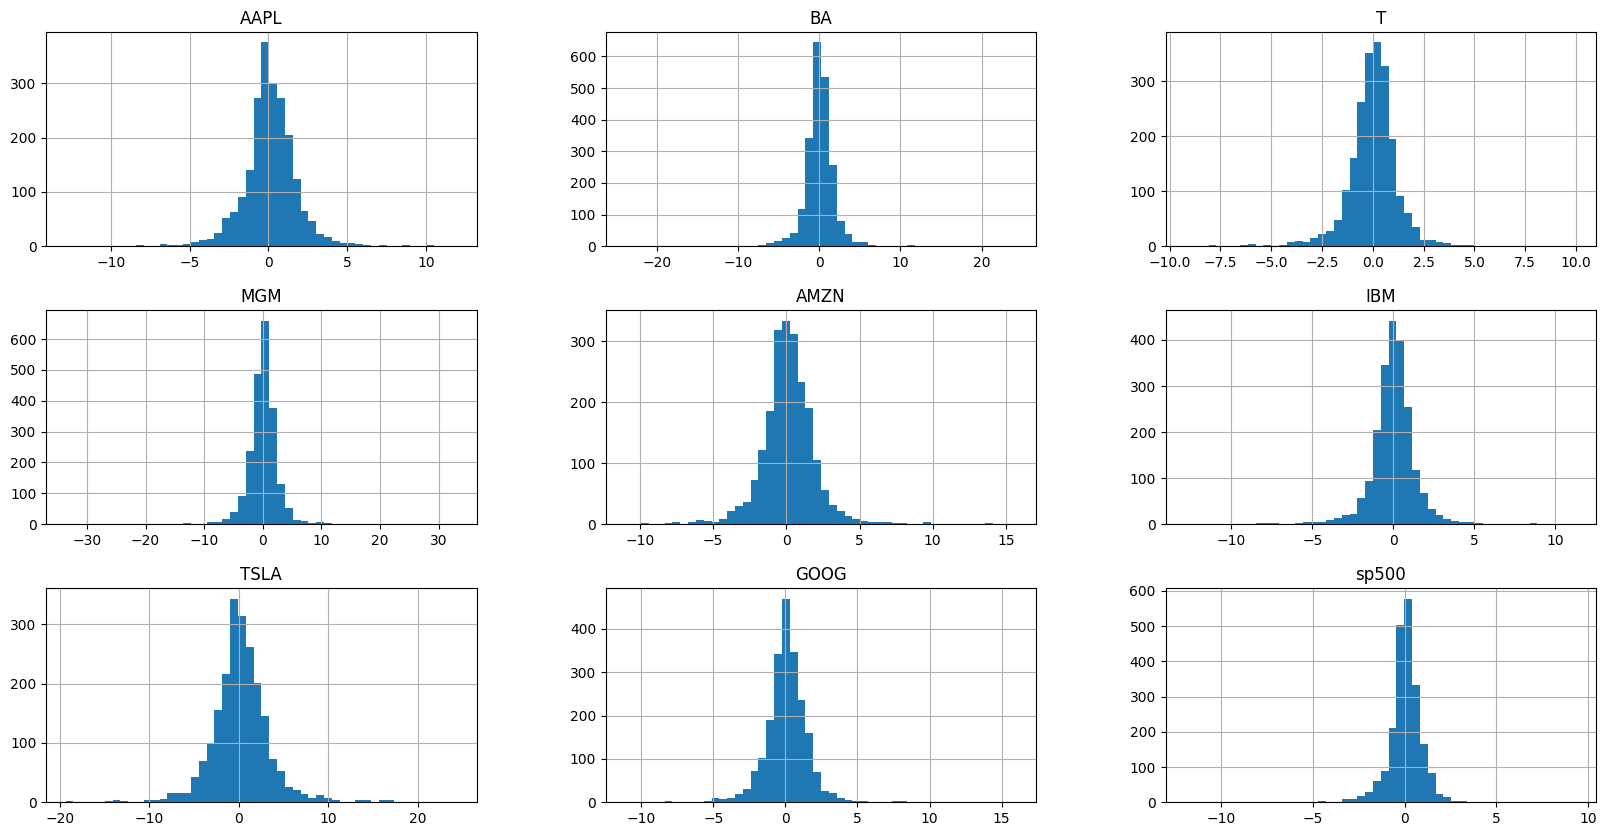

In [44]:
# Histogram of daily returns
stocks_daily_return.hist(bins=50, figsize=(20, 10))
plt.show();

In [45]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.drop(columns = 'Date').copy()


data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values) # Fixed the variable name here
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [47]:
#Complied histograms

fig = ff.create_distplot(data, df_hist.columns)
fig.show()